In [5]:
## TODO
# set workdir to project dir for all imports/relative dir references to work
# finish env integration

%load_ext autoreload
%autoreload 2

import gym
import matplotlib.pyplot as plt


# env = GridworldEnv()
import time
from algorithm_analysis.plotting import plot_episode_length_over_time, plot_episode_reward_over_time
from algorithm_analysis import qlearning
from envs.broken_components import BrokenComponentsEnv
from envs.data_handler import DataHandler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
t0 = time.monotonic()
dataHandler = DataHandler()
broken_components = dataHandler.get_sample_component_failure_pairs(5)
env = BrokenComponentsEnv(broken_components, reward_modus='raw')
print(f'Time until env is ready: {time.monotonic()-t0}')

Time until env is ready: 0.043332106000889326


Run q-learning with 32 states and 5 actions.
Run q-learning with 32 states and 5 actions.
Time until plots are ready: 24.585499991999313


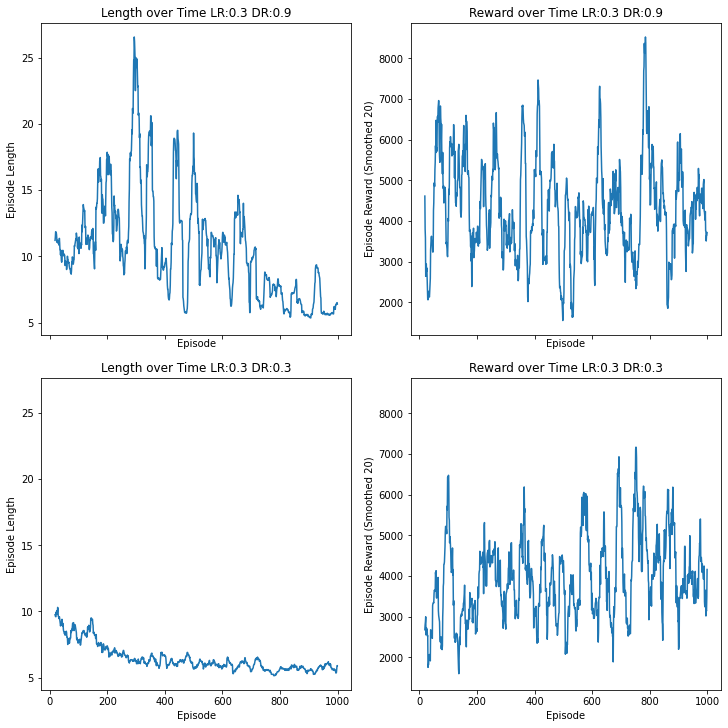

In [8]:
t0 = time.monotonic()
discount_rates = [0.9, 0.3]
learning_rates = [0.3]#, 0.7]
total_runs = len(discount_rates) * len(learning_rates)
num_plots = 2
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 5*total_runs), constrained_layout=True, sharex=True, sharey='col')
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        metric = qlearning.run(env, env.observation_space.n, env.action_space.n, episodes=1000,
                               learning_rate=learning_rate, discount_rate=discount_rate)
        ax_row = i * len(learning_rates) + j
        plot_episode_length_over_time(axs[ax_row, 0], metric, smoothing_window=20)
        plot_episode_reward_over_time(axs[ax_row, 1], metric, smoothing_window=20)
        

print(f'Time until plots are ready: {time.monotonic()-t0}')
plt.show()